In [5]:
import time

In [6]:
def genFunc():
    i = 0
    while(i < 1000000):
        time.sleep(1)
        yield i
        i += 1

In [13]:
genFunc_instance = genFunc()

In [14]:
arr = []
while(True):
    arr.append(genFunc_instance.__next__())

KeyboardInterrupt: 

In [16]:
len(arr)

7

In [2]:
genFunc_instance.__next__()

NameError: name 'genFunc_instance' is not defined

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import defaultdict

In [2]:
%matplotlib inline

In [44]:
class A:
    def __init__(self):
        # Key : iteration, value: list of tuples (node_diff, energy)
        self.store = defaultdict(list)
        # Key : iteration, value: gold_energy
        self.eng = defaultdict(int)
        self.lastIter = -1
all_data = defaultdict(lambda: A())

lastFile = ''
with open('outputs/plot_loss.csv', 'r') as fh:
    lossf_reader = csv.reader(fh)
    for lr in lossf_reader:
        #lr = next(lossf_reader)
        fn = lr[0]
        if lastFile != fn:
            all_data[fn].lastIter += 1
            all_data[fn].eng[all_data[fn].lastIter] = lr[4]
            lastFile = fn
        all_data[fn].store[all_data[fn].lastIter].append((lr[2], lr[3]))

In [50]:
files = list(all_data.keys())

328496.ds.bz2


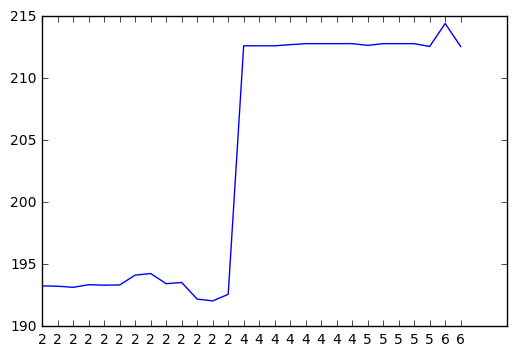

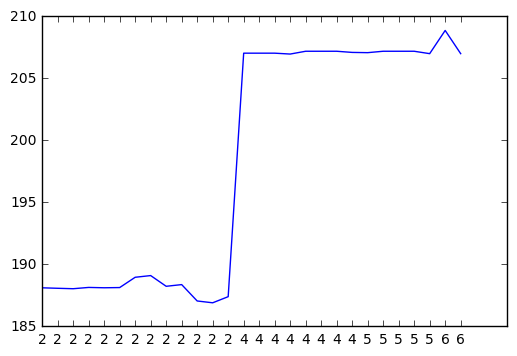

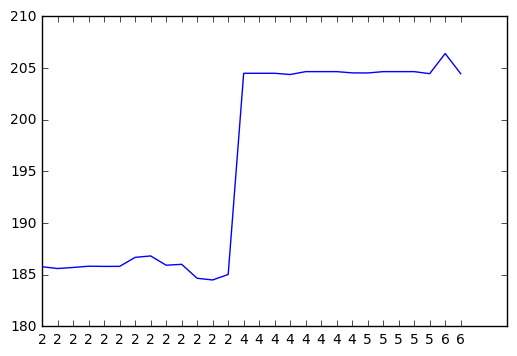

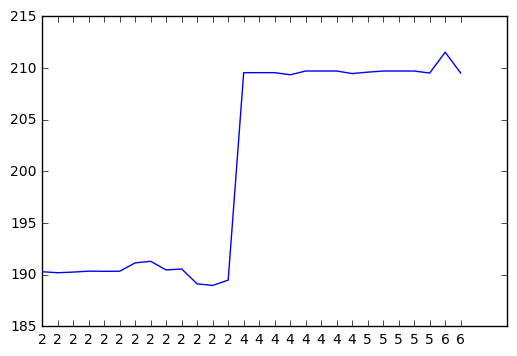

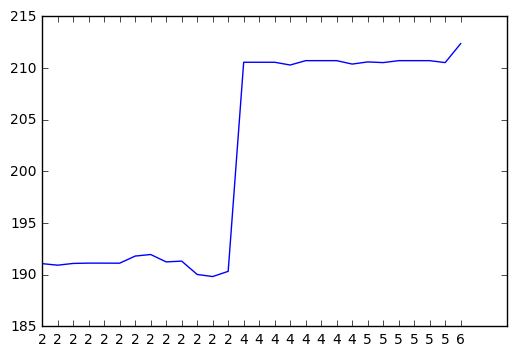

In [60]:
file_name = files[102]
print(file_name)
for itx in all_data[file_name].store.keys():
    energies = all_data[file_name].store[itx]
    energies.sort(key = lambda x: x[0])
    labels = [t[0] for t in energies]
    x = list(range(len(energies)))
    plt.plot([t[1] for t in energies])
    plt.xticks(x, labels)
    plt.show()

##### Good Files
- 78949.ds.bz2
- 328496.ds.bz2

#### 

In [4]:
import pickle, os

In [2]:
loaded_SKT = pickle.load(open('../Simultaneous_CompatSKT.p', 'rb'))
loaded_DCS = pickle.load(open('../Simultaneous_DCS.p', 'rb'))

In [3]:
loaded_SKT_n = {}
loaded_DCS_n = {}

In [5]:
fs_to_keep = []
for f in os.listdir('../NewData/skt_dcs_DS.bz2_1L_bigram_heldout/'):
    if '.ds.bz2' in f:
        fs_to_keep.append(f.replace('.ds.bz2', '.p2'))

In [8]:
for f in fs_to_keep:
    loaded_SKT_n[f] = loaded_SKT[f]
    loaded_DCS_n[f] = loaded_DCS[f]

In [10]:
pickle.dump(loaded_SKT_n, open('../Simultaneous_CompatSKT_ho.p', 'wb'))
pickle.dump(loaded_DCS_n, open('../Simultaneous_DCS_ho.p', 'wb'))